In [1]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import glob
import pytesseract
from PIL import Image, ImageFilter
from IPython.display import display
import os
import collections
from threading import Thread
from tqdm import tqdm
from skimage import io
%pylab inline
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 8)


Populating the interactive namespace from numpy and matplotlib


# Noise removal

In [2]:
addr = [cv2.imread(file,0) for file in glob.glob("text_boxes/address/*")]
date = [cv2.imread(file,0) for file in glob.glob("text_boxes/date/*")]
name =  [cv2.imread(file,0) for file in glob.glob("text_boxes/name/*")]

In [3]:
for a in addr:
    print(a.shape)

(40, 411)
(33, 138)
(33, 347)
(39, 165)
(42, 412)
(60, 346)
(39, 414)
(40, 421)
(32, 359)
(39, 411)
(33, 344)
(33, 346)
(33, 344)
(33, 346)
(33, 352)
(42, 411)
(40, 415)
(40, 413)
(40, 419)
(33, 344)
(60, 378)
(40, 411)
(40, 414)
(33, 346)
(40, 416)
(33, 346)
(39, 414)
(33, 346)
(33, 344)
(39, 414)
(33, 346)
(33, 344)
(33, 345)
(33, 343)
(38, 430)
(33, 346)
(33, 349)
(40, 414)
(40, 414)
(33, 346)
(40, 414)
(34, 344)
(39, 412)
(40, 412)
(39, 421)
(40, 414)
(35, 343)
(33, 345)
(40, 409)
(40, 412)
(33, 346)
(40, 413)
(33, 345)
(33, 346)
(33, 344)
(89, 391)
(39, 412)
(40, 417)
(33, 346)
(33, 344)
(33, 345)
(39, 419)
(34, 344)
(33, 350)
(67, 688)
(40, 411)
(33, 346)
(36, 344)
(33, 343)
(40, 413)
(39, 410)
(34, 344)
(42, 411)
(33, 350)
(41, 412)
(40, 413)
(33, 346)
(33, 346)
(33, 344)
(35, 344)
(41, 412)
(39, 414)
(40, 412)
(33, 344)
(40, 420)
(33, 345)
(33, 344)
(40, 419)
(39, 412)
(40, 414)
(40, 419)
(40, 415)
(67, 401)
(33, 343)
(79, 824)
(33, 342)
(34, 343)
(42, 411)
(33, 343)
(40, 415)


In [4]:
addrSki = [io.imread(file) for file in glob.glob("text_boxes/address/*")]
dateSki = [io.imread(file) for file in glob.glob("text_boxes/date/*")]
nameSki =  [io.imread(file) for file in glob.glob("text_boxes/name/*")]

In [5]:
for a in addrSki:
    print(a.shape)

(40, 411)
(33, 138)
(33, 347)
(39, 165)
(42, 412)
(60, 346)
(39, 414)
(40, 421)
(32, 359)
(39, 411)
(33, 344)
(33, 346)
(33, 344)
(33, 346)
(33, 352)
(42, 411)
(40, 415)
(40, 413)
(40, 419)
(33, 344)
(60, 378)
(40, 411)
(40, 414)
(33, 346)
(40, 416)
(33, 346)
(39, 414)
(33, 346)
(33, 344)
(39, 414)
(33, 346)
(33, 344)
(33, 345)
(33, 343)
(38, 430)
(33, 346)
(33, 349)
(40, 414)
(40, 414)
(33, 346)
(40, 414)
(34, 344)
(39, 412)
(40, 412)
(39, 421)
(40, 414)
(35, 343)
(33, 345)
(40, 409)
(40, 412)
(33, 346)
(40, 413)
(33, 345)
(33, 346)
(33, 344)
(89, 391)
(39, 412)
(40, 417)
(33, 346)
(33, 344)
(33, 345)
(39, 419)
(34, 344)
(33, 350)
(67, 688)
(40, 411)
(33, 346)
(36, 344)
(33, 343)
(40, 413)
(39, 410)
(34, 344)
(42, 411)
(33, 350)
(41, 412)
(40, 413)
(33, 346)
(33, 346)
(33, 344)
(35, 344)
(41, 412)
(39, 414)
(40, 412)
(33, 344)
(40, 420)
(33, 345)
(33, 344)
(40, 419)
(39, 412)
(40, 414)
(40, 419)
(40, 415)
(67, 401)
(33, 343)
(79, 824)
(33, 342)
(34, 343)
(42, 411)
(33, 343)
(40, 415)


In [6]:
addrPil = [Image.open(file) for file in glob.glob("text_boxes/address/*")]
datePil =[Image.open(file) for file in glob.glob("text_boxes/date/*")]
namePil = [Image.open(file) for file in glob.glob("text_boxes/name/*")]

In [8]:
for a in addrPil:
    print(a.load)

<bound method TiffImageFile.load of <PIL.TiffImagePlugin.TiffImageFile image mode=L size=411x40 at 0x7F2958663C50>>
<bound method TiffImageFile.load of <PIL.TiffImagePlugin.TiffImageFile image mode=L size=138x33 at 0x7F2958599588>>
<bound method TiffImageFile.load of <PIL.TiffImagePlugin.TiffImageFile image mode=L size=347x33 at 0x7F29585997F0>>
<bound method TiffImageFile.load of <PIL.TiffImagePlugin.TiffImageFile image mode=L size=165x39 at 0x7F2958599A58>>
<bound method TiffImageFile.load of <PIL.TiffImagePlugin.TiffImageFile image mode=L size=412x42 at 0x7F2958599CC0>>
<bound method TiffImageFile.load of <PIL.TiffImagePlugin.TiffImageFile image mode=L size=346x60 at 0x7F2958599F28>>
<bound method TiffImageFile.load of <PIL.TiffImagePlugin.TiffImageFile image mode=L size=414x39 at 0x7F29585A1438>>
<bound method TiffImageFile.load of <PIL.TiffImagePlugin.TiffImageFile image mode=L size=421x40 at 0x7F29585A16A0>>
<bound method TiffImageFile.load of <PIL.TiffImagePlugin.TiffImageFile i

**Resize**

## Original images

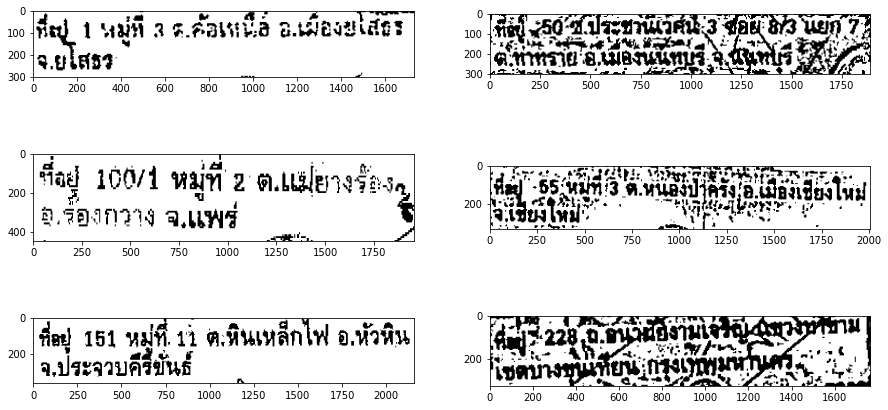

In [8]:
pylab.rcParams['figure.figsize'] = (15, 8)
for i in range(6):
    plt.subplot(3,2,i+1),plt.imshow(addr[i],'gray')
plt.show()

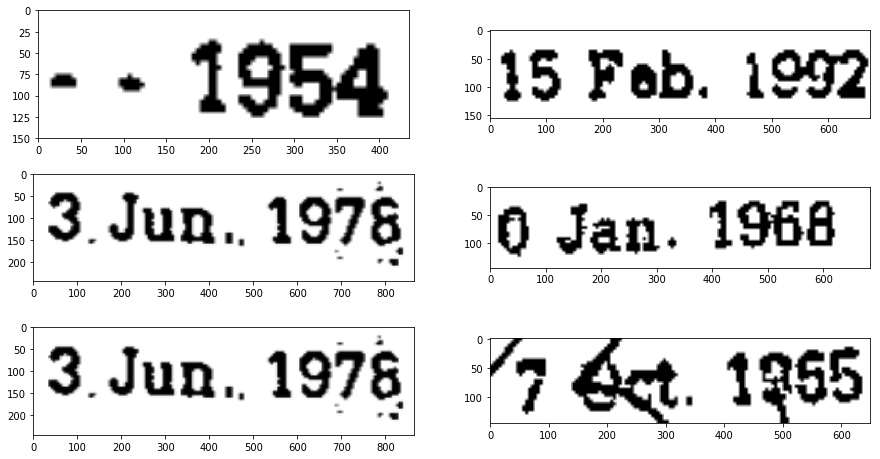

In [9]:
for i in range(6):
    plt.subplot(3,2,i+1),plt.imshow(date[i],'gray')
plt.show()

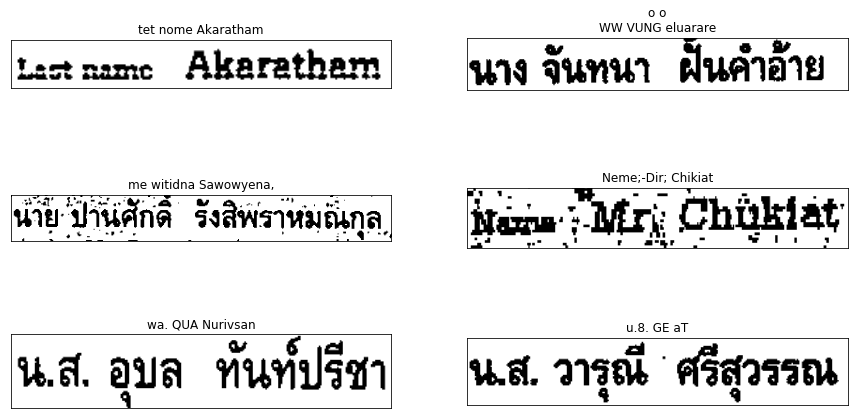

In [10]:
for i in range(6):
    plt.subplot(3,2,i+1),plt.imshow(name[i],'gray')
    trans = pytesseract.image_to_string(Image.fromarray(name[i]), "eng")
    plt.title(trans)
    plt.xticks([]),plt.yticks([])
plt.show()

## Quentin noise removal

In [11]:
def sum_pixels(pixels, w, h, x, y):
    sum = 0
    for i in range(-1, 2):
        for j in range(-1, 2):
            px, py = x + i, y + j
            if px >= 0 and px < w and py >= 0 and py < h: 
                if pixels[px, py] != 255:
                    sum += 1
                
    return sum
                
def remove_noises(thread_id, w, h, num_threads, pixels_original, pixels, min_pix, blackend):
    for x in range(thread_id, w, num_threads): 
        for y in range(h): 
              # Check if it's an "alone" pixel
                if sum_pixels(pixels_original, w, h, x, y) <= min_pix:
                    # Replace the pixel data with the colour white
                    pixels[x, y] = 255
                elif blackend:
                    # probably not a good idea
                    pixels[x, y] = 0
                    
def remove_noises_mult_thread(im, min_pix, blackend, num_threads=20):
    pixels_original = im.load()
    w, h = im.size
    print(w, h)
    
    im_copy = im.copy()
    pixels = im_copy.load()
    
    thr = [None] * num_threads
    for i in range(num_threads):
        thr[i] = Thread(target=remove_noises, 
                        args=(i, w, h, num_threads, pixels_original, pixels, min_pix, blackend))
        thr[i].start()

    # wait that all the threads are done
    for i in tqdm(range(num_threads), position=0):
        thr[i].join()

    return im_copy    

In [12]:
def quentinDenoising(l, nTimes, minPix, blackend):
    for i in range(6):
        denImg = remove_noises_mult_thread(l[i], minPix, blackend)
        for t in range(nTimes - 1):
            denImg = remove_noises_mult_thread(denImg, 1, blackend)
        plt.subplot(3,2,i+1),plt.imshow(denImg,'gray')
        trans = pytesseract.image_to_string(denImg, "eng")
        plt.title(trans)
        plt.xticks([]),plt.yticks([])
    plt.show()

**One iteration, with blackend**

1730 300


100%|██████████| 20/20 [00:00<00:00, 53.37it/s]


1890 300


100%|██████████| 20/20 [00:00<00:00, 77.82it/s]


1955 445


100%|██████████| 20/20 [00:00<00:00, 55.58it/s]


2005 335


100%|██████████| 20/20 [00:00<00:00, 59.59it/s]


2155 370


100%|██████████| 20/20 [00:00<00:00, 30.01it/s]


1765 325


100%|██████████| 20/20 [00:00<00:00, 69.89it/s]


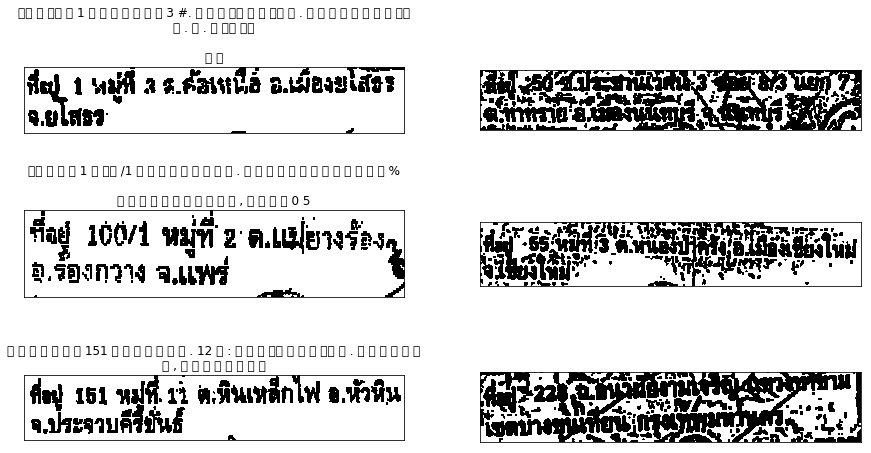

In [66]:
quentinDenoising(addrPil, 1, 2, True)

**Two iterations, with blackend**

1730 300


100%|██████████| 20/20 [00:00<00:00, 62.60it/s]


1730 300


100%|██████████| 20/20 [00:00<00:00, 140.49it/s]


1890 300


100%|██████████| 20/20 [00:00<00:00, 69.77it/s] 


1890 300


100%|██████████| 20/20 [00:00<00:00, 87.15it/s]


1955 445


100%|██████████| 20/20 [00:00<00:00, 30.12it/s]


1955 445


100%|██████████| 20/20 [00:00<00:00, 32.54it/s]


2005 335


100%|██████████| 20/20 [00:00<00:00, 47.12it/s]


2005 335


100%|██████████| 20/20 [00:00<00:00, 79.90it/s] 


2155 370


100%|██████████| 20/20 [00:00<00:00, 37.33it/s]


2155 370


100%|██████████| 20/20 [00:00<00:00, 27.47it/s]


1765 325


100%|██████████| 20/20 [00:00<00:00, 135.40it/s]


1765 325


100%|██████████| 20/20 [00:00<00:00, 156.55it/s]


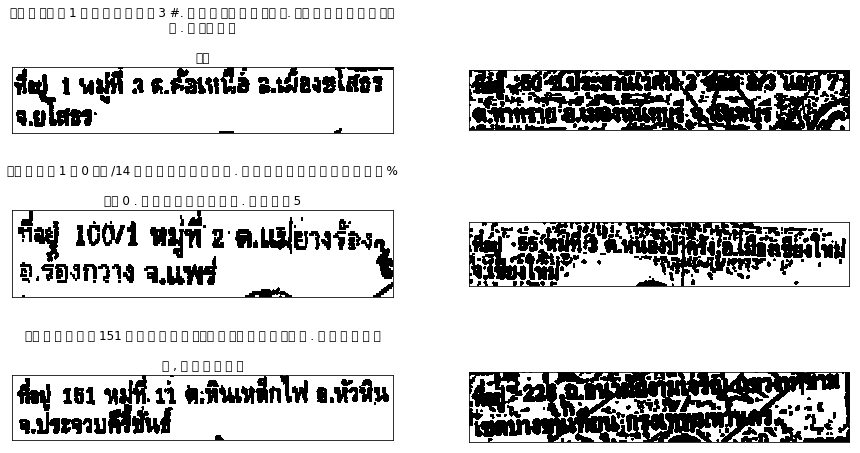

In [65]:
quentinDenoising(addrPil, 2, 2, True)

1730 300


100%|██████████| 20/20 [00:00<00:00, 849.54it/s]


1890 300


100%|██████████| 20/20 [00:00<00:00, 154.94it/s]


1955 445


100%|██████████| 20/20 [00:00<00:00, 60.42it/s]


2005 335


100%|██████████| 20/20 [00:00<00:00, 212.36it/s]


2155 370


100%|██████████| 20/20 [00:00<00:00, 249.10it/s]


1765 325


100%|██████████| 20/20 [00:00<00:00, 163.83it/s]


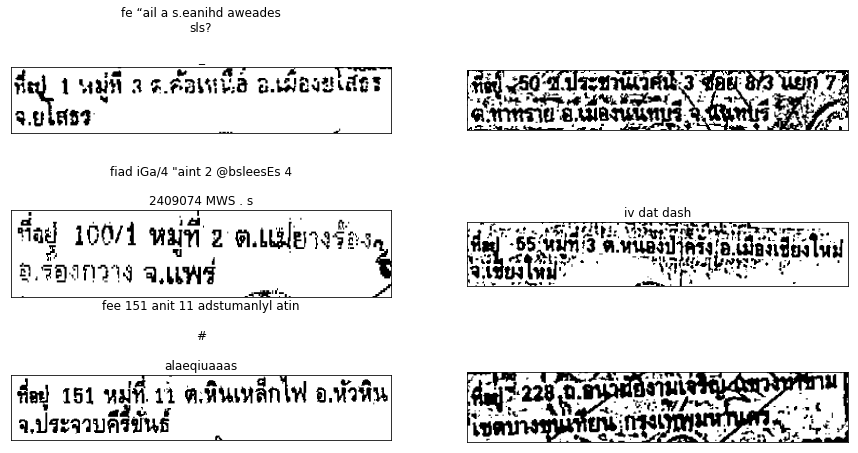

In [98]:
quentinDenoising(addrPil, 1, 2, False)

**Two iterations, without blackend**

1730 300


100%|██████████| 20/20 [00:00<00:00, 389.26it/s]


1730 300


100%|██████████| 20/20 [00:00<00:00, 91.37it/s]


1890 300


100%|██████████| 20/20 [00:00<00:00, 108.68it/s]


1890 300


100%|██████████| 20/20 [00:00<00:00, 96.52it/s] 


1955 445


100%|██████████| 20/20 [00:00<00:00, 35.29it/s]


1955 445


100%|██████████| 20/20 [00:00<00:00, 34.36it/s]


2005 335


100%|██████████| 20/20 [00:00<00:00, 294.13it/s]


2005 335


100%|██████████| 20/20 [00:00<00:00, 46.33it/s]


2155 370


100%|██████████| 20/20 [00:00<00:00, 64.48it/s]


2155 370


100%|██████████| 20/20 [00:00<00:00, 55.52it/s] 


1765 325


100%|██████████| 20/20 [00:00<00:00, 125.18it/s]


1765 325


100%|██████████| 20/20 [00:00<00:00, 79.66it/s] 


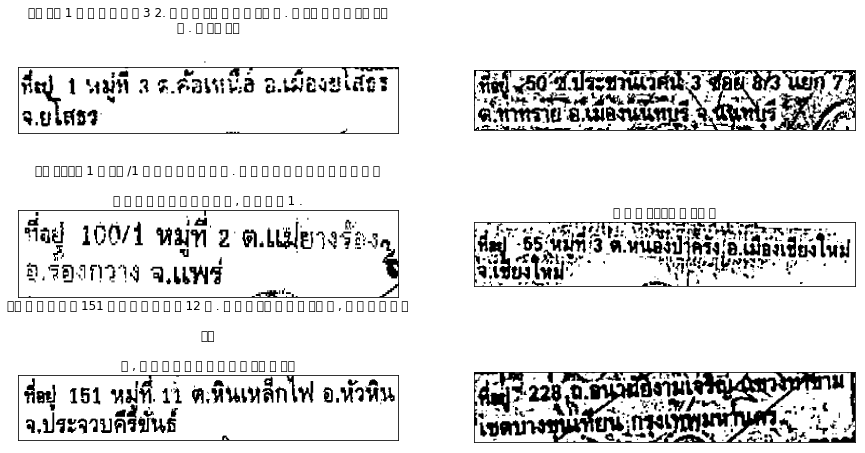

In [69]:
quentinDenoising(addrPil, 2, 2, False)

1145 145


100%|██████████| 20/20 [00:00<00:00, 3039.68it/s]


1565 215


100%|██████████| 20/20 [00:00<00:00, 123.53it/s]


2030 245


100%|██████████| 20/20 [00:00<00:00, 89145.67it/s]


1490 235


100%|██████████| 20/20 [00:00<00:00, 185.84it/s]


1355 265


100%|██████████| 20/20 [00:00<00:00, 5955.70it/s]


1450 255


100%|██████████| 20/20 [00:00<00:00, 2382.11it/s]


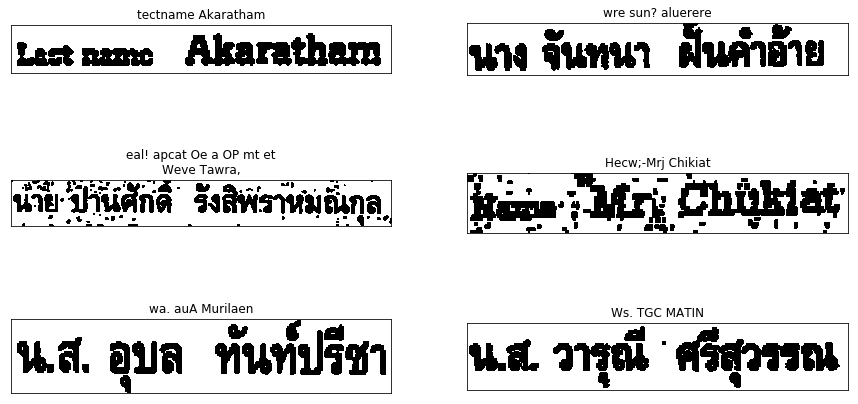

In [97]:
quentinDenoising(namePil, 1, 2, True)

1145 145


100%|██████████| 20/20 [00:00<00:00, 24781.71it/s]


1565 215


100%|██████████| 20/20 [00:00<00:00, 218.49it/s]


2030 245


100%|██████████| 20/20 [00:00<00:00, 110.73it/s]


1490 235


100%|██████████| 20/20 [00:00<00:00, 188.08it/s]


1355 265


100%|██████████| 20/20 [00:00<00:00, 135.83it/s]


1450 255


100%|██████████| 20/20 [00:00<00:00, 7922.75it/s]


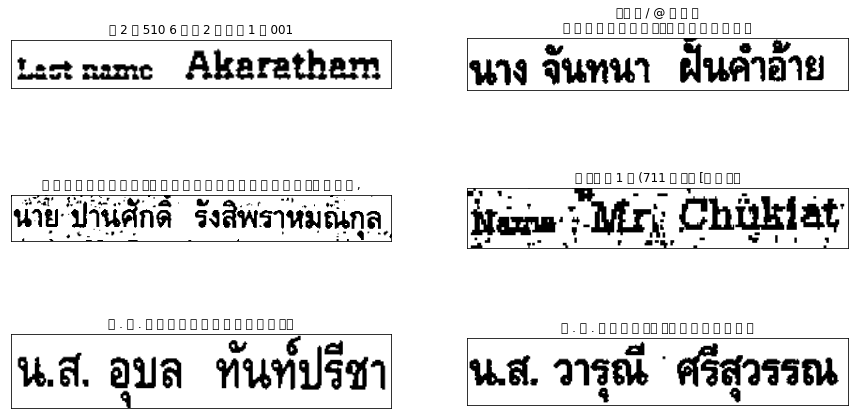

In [70]:
quentinDenoising(namePil, 1, 2, False)

435 150


100%|██████████| 20/20 [00:00<00:00, 10455.70it/s]


675 155


100%|██████████| 20/20 [00:00<00:00, 109511.85it/s]


865 245


100%|██████████| 20/20 [00:00<00:00, 91678.78it/s]


685 145


100%|██████████| 20/20 [00:00<00:00, 104726.69it/s]


865 245


100%|██████████| 20/20 [00:00<00:00, 13351.28it/s]


650 145


100%|██████████| 20/20 [00:00<00:00, 93414.34it/s]


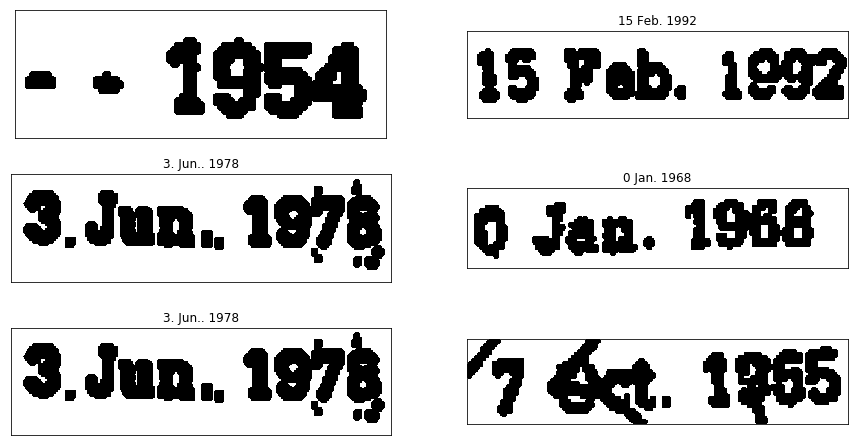

In [75]:
quentinDenoising(datePil, 1, 2, True)

435 150


100%|██████████| 20/20 [00:00<00:00, 5441.49it/s]


675 155


100%|██████████| 20/20 [00:00<00:00, 45027.42it/s]


865 245


100%|██████████| 20/20 [00:00<00:00, 1874.09it/s]


685 145


100%|██████████| 20/20 [00:00<00:00, 144134.16it/s]


865 245


100%|██████████| 20/20 [00:00<00:00, 1180.45it/s]


650 145


100%|██████████| 20/20 [00:00<00:00, 34620.75it/s]


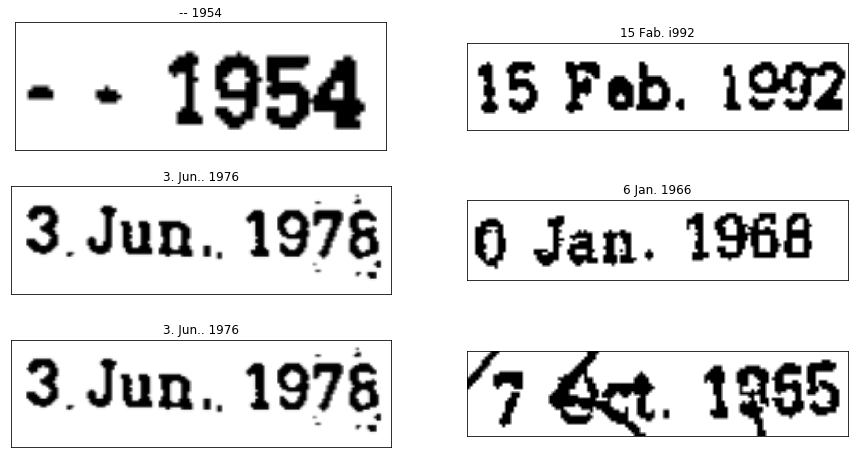

In [76]:
quentinDenoising(datePil, 1, 2, False)

## Image thresholding

In [13]:
def plotThresh(l, lang):
    for i in range(6):
        thresh = cv2.adaptiveThreshold(l[i],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
        plt.subplot(3,2,i+1),plt.imshow(thresh,'gray')
        tesserIm = Image.fromarray(thresh)
        trans = pytesseract.image_to_string(tesserIm, lang)
        plt.title(trans)
        plt.xticks([]),plt.yticks([])
    plt.show()

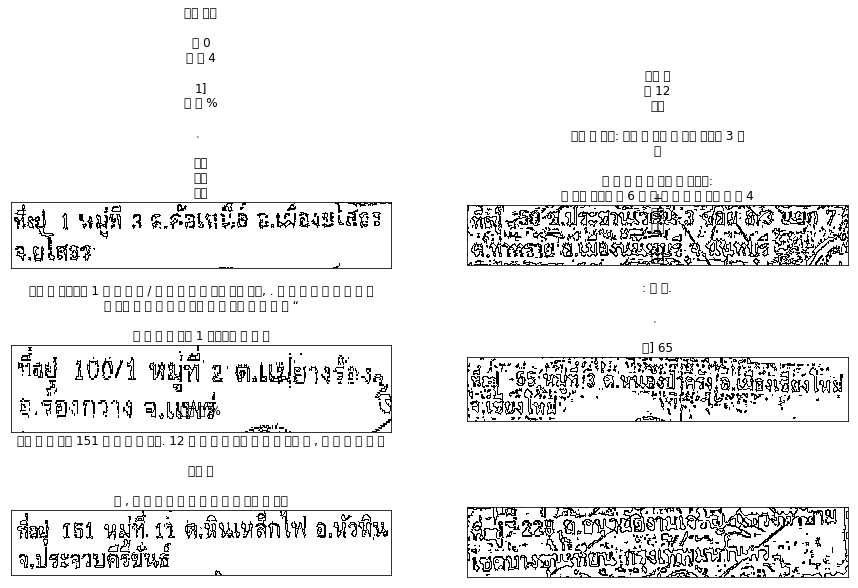

In [14]:
pylab.rcParams['figure.figsize'] = (15, 8)
plotThresh(addr, "tha")

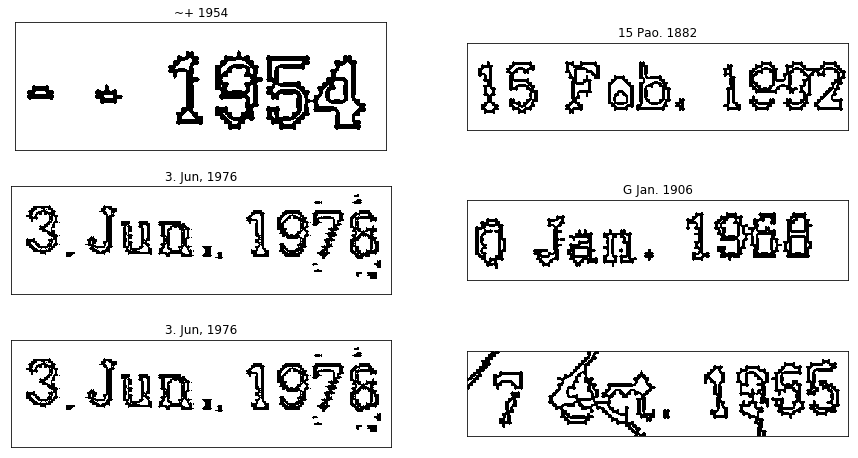

In [15]:
plotThresh(date, "eng")

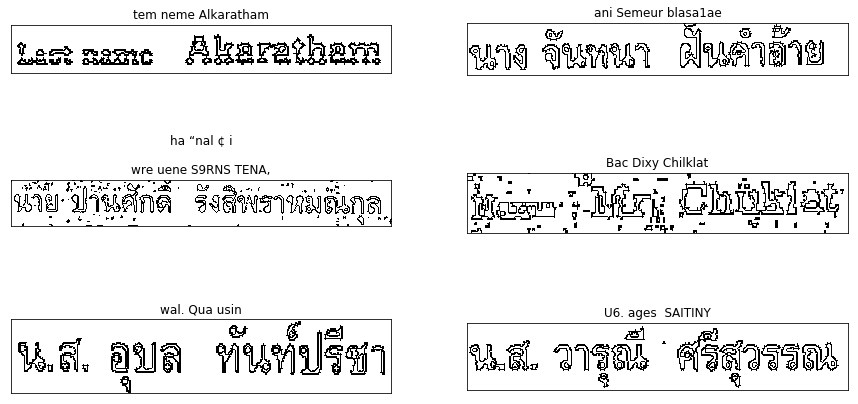

In [16]:
plotThresh(name, "eng")

### OTSU thresholding after gaussian filtering

In [17]:
def plotThreshOtsu(l, lang):
    for i in range(6):
        gausFilt = cv2.GaussianBlur(l[i],(5,5),0)
        ret,thresh = cv2.threshold(gausFilt,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        plt.subplot(3,2,i+1),plt.imshow(thresh,'gray')
        tesserIm = Image.fromarray(thresh)
        trans = pytesseract.image_to_string(tesserIm, lang)
        plt.title(trans)
        plt.xticks([]),plt.yticks([])
    plt.show()

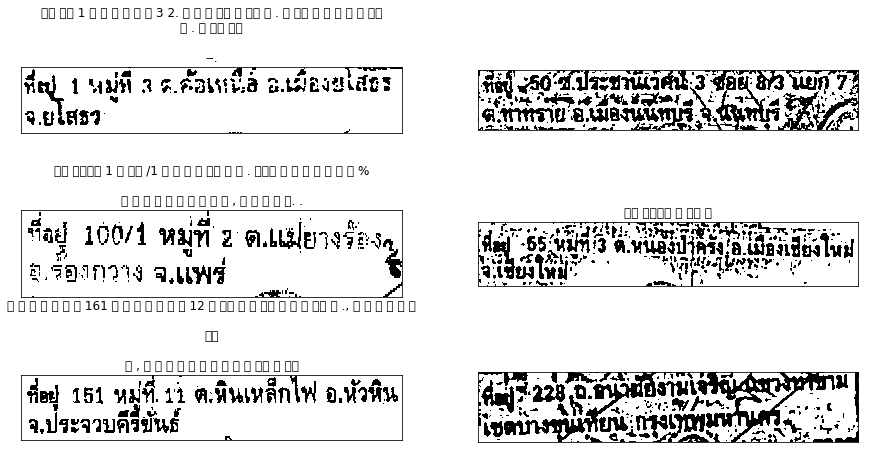

In [18]:
plotThreshOtsu(addr, "tha")

## Morphological transformations

### First erosion then dilatation with optional Quentin denoising

In [19]:
def plotErosionDil(l, lang, kSize, activatedQuentin):
    kernel = np.ones((kSize, kSize),np.uint8)
    for i in range(6):
        if activatedQuentin:
            img = Image.fromarray(l[i])
            pilImg = remove_noises_mult_thread(img, 1, True)
            img = numpy.array(pilImg) 
        else:
            img = l[i]
        img = np.invert(img)
        imgEro = cv2.erode(img,kernel,iterations = 1)
        imgDil = cv2.dilate(imgEro,kernel,iterations = 1)
        imgDil = np.invert(img)
        plt.subplot(3,2,i+1),plt.imshow(imgDil,'gray')
        tesserIm = Image.fromarray(imgDil)
        trans = pytesseract.image_to_string(tesserIm, lang)
        plt.title(trans)
        plt.xticks([]),plt.yticks([])
    plt.show()

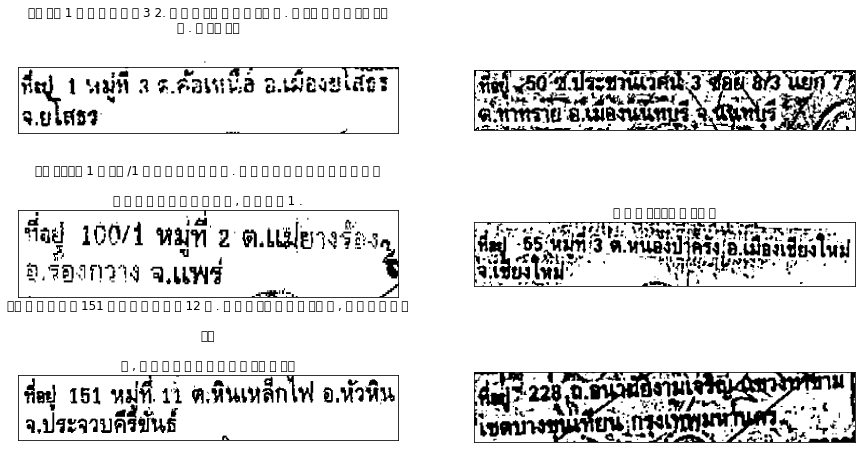

In [20]:
plotErosionDil(addr, "tha", 5, False)

1730 300


100%|██████████| 20/20 [00:00<00:00, 1569.64it/s]


1890 300


100%|██████████| 20/20 [00:00<00:00, 120.88it/s]


1955 445


100%|██████████| 20/20 [00:00<00:00, 65.46it/s] 


2005 335


100%|██████████| 20/20 [00:00<00:00, 74169.83it/s]


2155 370


100%|██████████| 20/20 [00:00<00:00, 257.80it/s]


1765 325


100%|██████████| 20/20 [00:00<00:00, 348.72it/s]


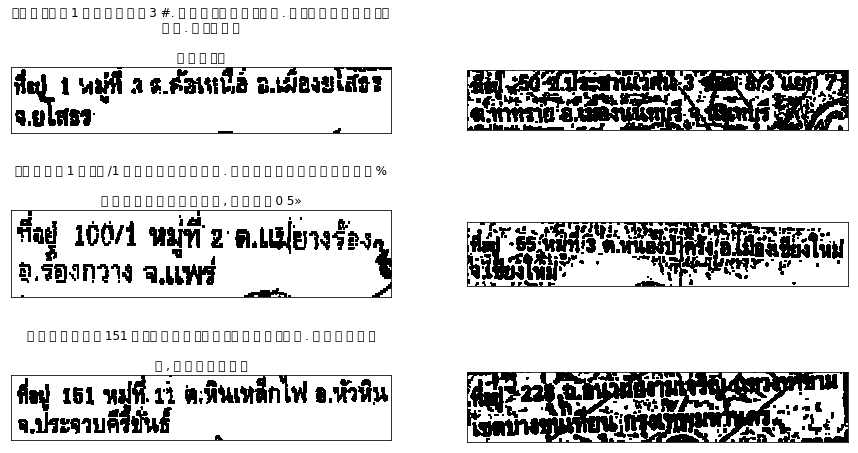

In [21]:
plotErosionDil(addr, "tha", 5, True)

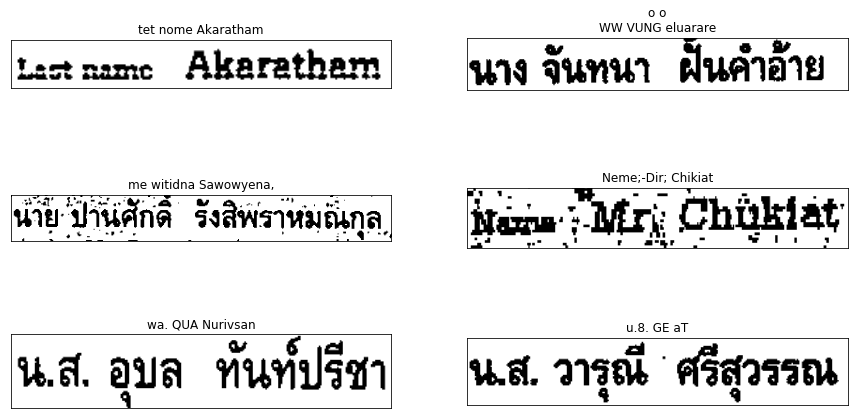

In [180]:
plotErosionDil(name, "eng", 5, False)

1145 145


100%|██████████| 20/20 [00:00<00:00, 59705.40it/s]


1565 215


100%|██████████| 20/20 [00:00<00:00, 236.47it/s]


2030 245


100%|██████████| 20/20 [00:00<00:00, 83137.84it/s]


1490 235


100%|██████████| 20/20 [00:00<00:00, 478.48it/s]


1355 265


100%|██████████| 20/20 [00:00<00:00, 2272.60it/s]


1450 255


100%|██████████| 20/20 [00:00<00:00, 110086.72it/s]


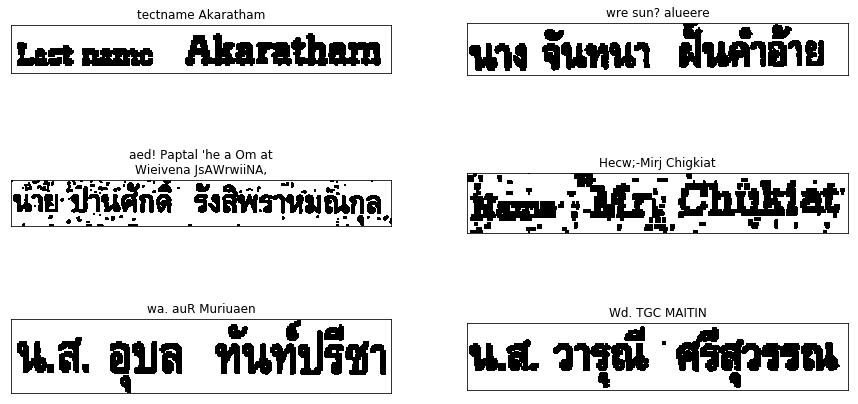

In [181]:
plotErosionDil(name, "eng", 5, True)

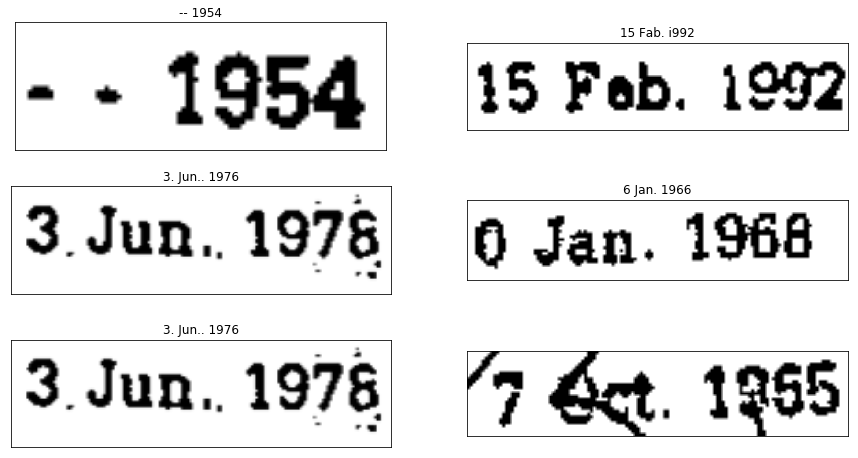

In [182]:
plotErosionDil(date, "eng", 5, False)

100%|██████████| 20/20 [00:00<00:00, 153919.41it/s]

435 150


675 155


100%|██████████| 20/20 [00:00<00:00, 42495.48it/s]


865 245


100%|██████████| 20/20 [00:00<00:00, 65689.96it/s]


685 145


100%|██████████| 20/20 [00:00<00:00, 75846.37it/s]


865 245


100%|██████████| 20/20 [00:00<00:00, 58457.20it/s]


650 145


100%|██████████| 20/20 [00:00<00:00, 72944.42it/s]


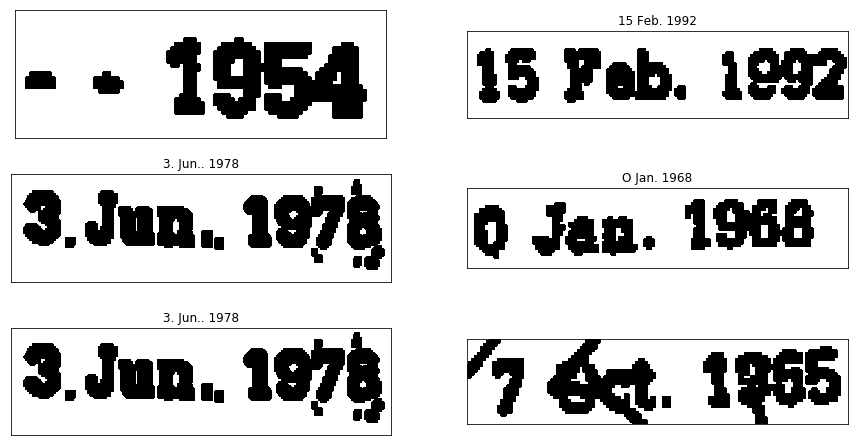

In [183]:
plotErosionDil(date, "eng", 5, True)

### First dilatation then erosion with optional Quentin denoising

In [22]:
def plotDilErosion(l, lang, kSize, activatedQuentin):
    kernel = np.ones((kSize, kSize),np.uint8)
    for i in range(6):
        if activatedQuentin:
            img = Image.fromarray(l[i])
            pilImg = remove_noises_mult_thread(img, 1, True)
            img = numpy.array(pilImg) 
        else:
            img = l[i]
        img = np.invert(img)
        img = cv2.GaussianBlur(img,(5,5),0)
        imgDil = cv2.dilate(img,kernel,iterations = 1)
        imgEro = cv2.erode(imgDil,kernel,iterations = 1)
        imgEro = np.invert(imgEro)
        plt.subplot(3,2,i+1),plt.imshow(imgEro,'gray')
        tesserIm = Image.fromarray(imgEro)
        trans = pytesseract.image_to_string(tesserIm, lang)
        plt.title(trans)
        plt.xticks([]),plt.yticks([])
    plt.show()

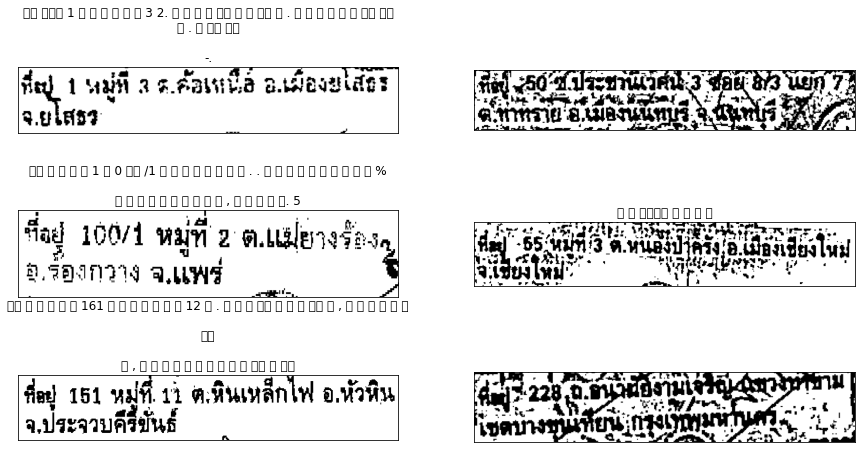

In [23]:
plotDilErosion(addr, "tha", 5, False)

1730 300


100%|██████████| 20/20 [00:00<00:00, 625.18it/s]


1890 300


100%|██████████| 20/20 [00:00<00:00, 197.53it/s]


1955 445


100%|██████████| 20/20 [00:00<00:00, 31.10it/s]


2005 335


100%|██████████| 20/20 [00:00<00:00, 144.61it/s]


2155 370


100%|██████████| 20/20 [00:00<00:00, 78.09it/s] 


1765 325


100%|██████████| 20/20 [00:00<00:00, 80.35it/s]


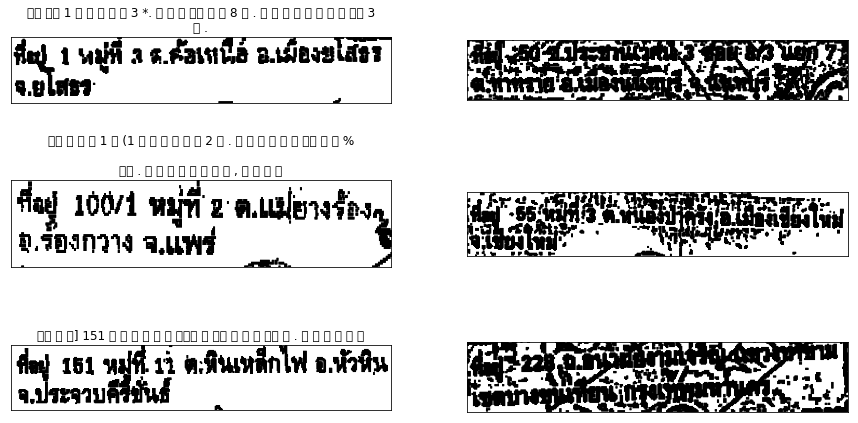

In [24]:
plotDilErosion(addr, "tha", 5, True)

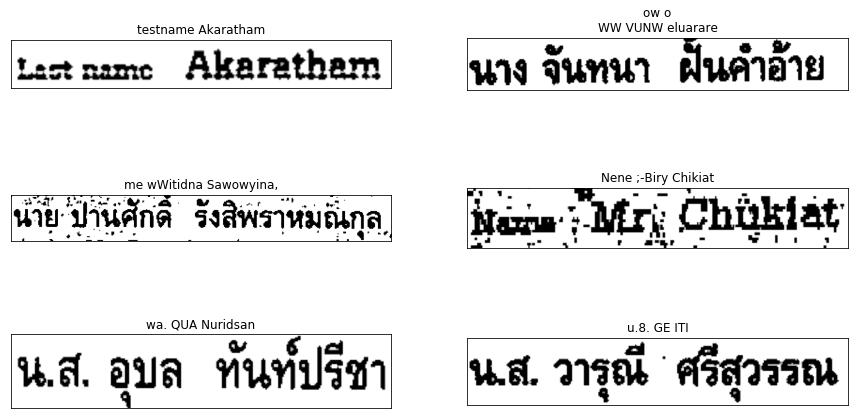

In [191]:
plotDilErosion(name, "eng", 5, False)

1145 145


100%|██████████| 20/20 [00:00<00:00, 83302.96it/s]


1565 215


100%|██████████| 20/20 [00:00<00:00, 3617.65it/s]


2030 245


100%|██████████| 20/20 [00:00<00:00, 86.19it/s]


1490 235


100%|██████████| 20/20 [00:00<00:00, 861.36it/s]


1355 265


100%|██████████| 20/20 [00:00<00:00, 4820.49it/s]


1450 255


100%|██████████| 20/20 [00:00<00:00, 66682.10it/s]


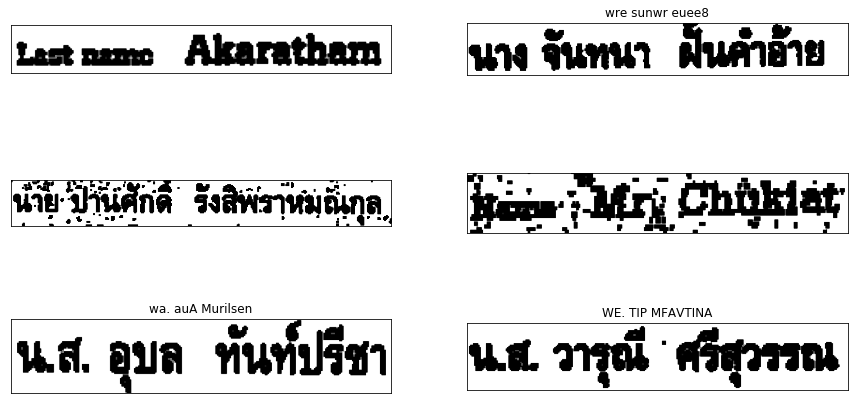

In [192]:
plotDilErosion(name, "eng", 5, True)

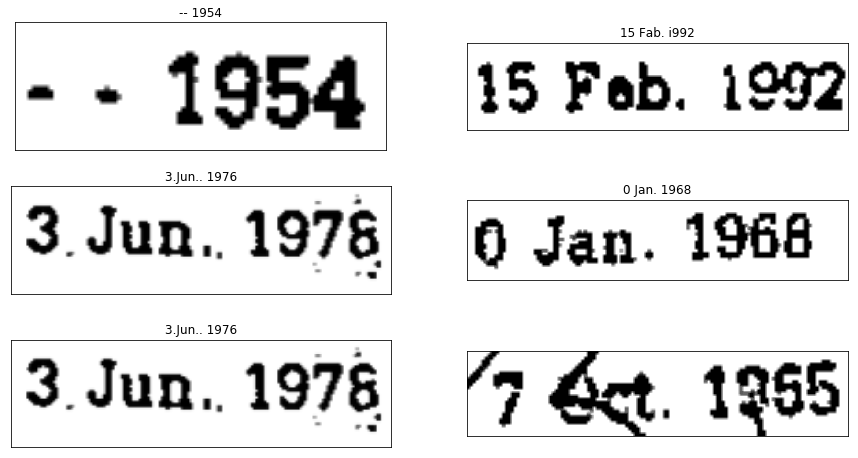

In [142]:
plotDilErosion(date, "eng", 5, False)

435 150


100%|██████████| 20/20 [00:00<00:00, 87655.26it/s]


675 155


100%|██████████| 20/20 [00:00<00:00, 140043.54it/s]


865 245


100%|██████████| 20/20 [00:00<00:00, 94466.31it/s]


685 145


100%|██████████| 20/20 [00:00<00:00, 161630.21it/s]


865 245


100%|██████████| 20/20 [00:00<00:00, 110960.42it/s]


650 145


100%|██████████| 20/20 [00:00<00:00, 47608.44it/s]


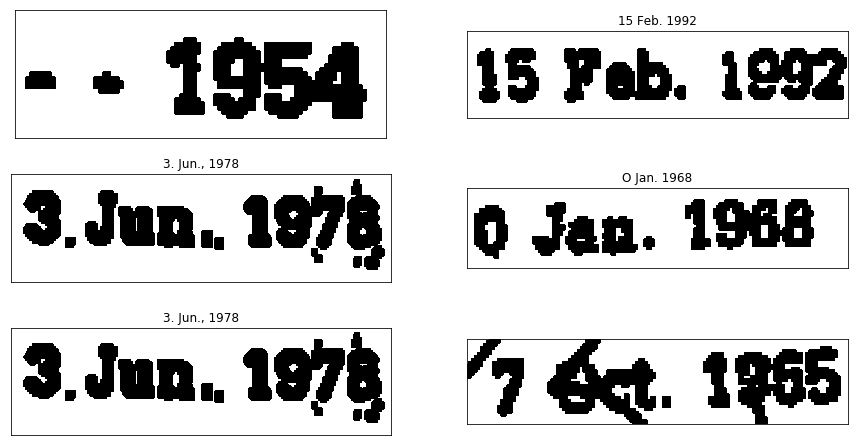

In [143]:
plotDilErosion(date, "eng", 5, True)

### Standard denoising

In [50]:
def plotDenoising(l, lang):
    for i in range(6):
        imgDen = np.invert(cv2.fastNlMeansDenoising(np.invert(l[i]),None,10,7,21))
        plt.subplot(3,2,i+1),plt.imshow(imgDen)
        tesserIm = Image.fromarray(imgDen)
        trans = pytesseract.image_to_string(tesserIm, lang)
        plt.title(trans)
        plt.xticks([]),plt.yticks([])
    plt.show()

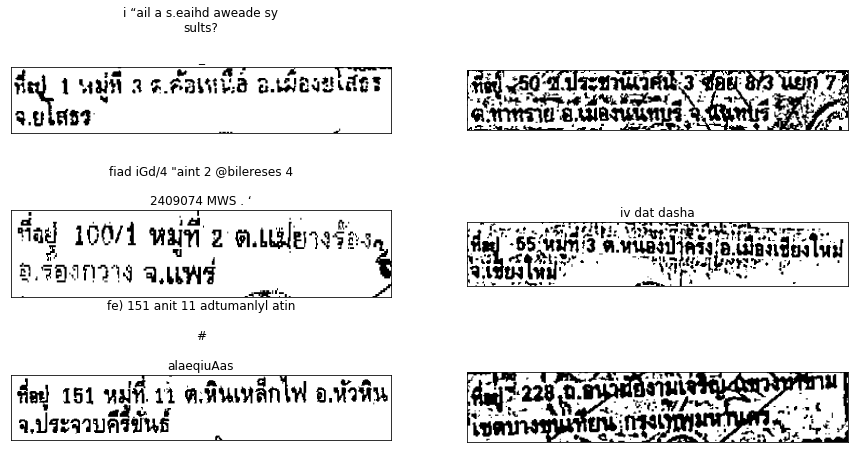

In [51]:
plotDenoising(addr, "eng")

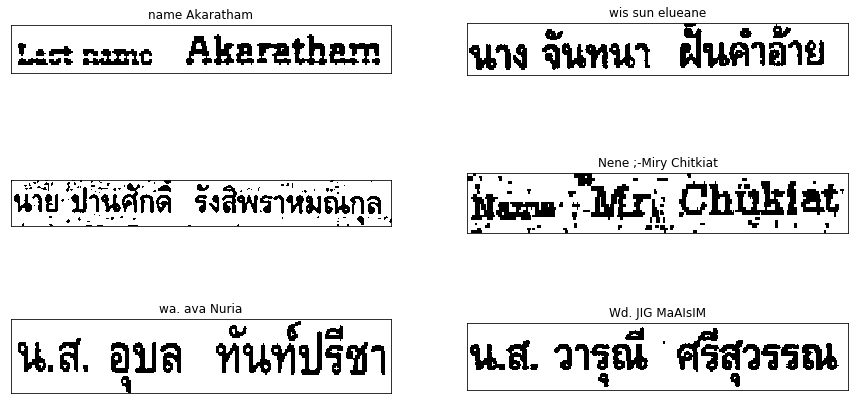

In [226]:
plotDenoising(name, "eng")

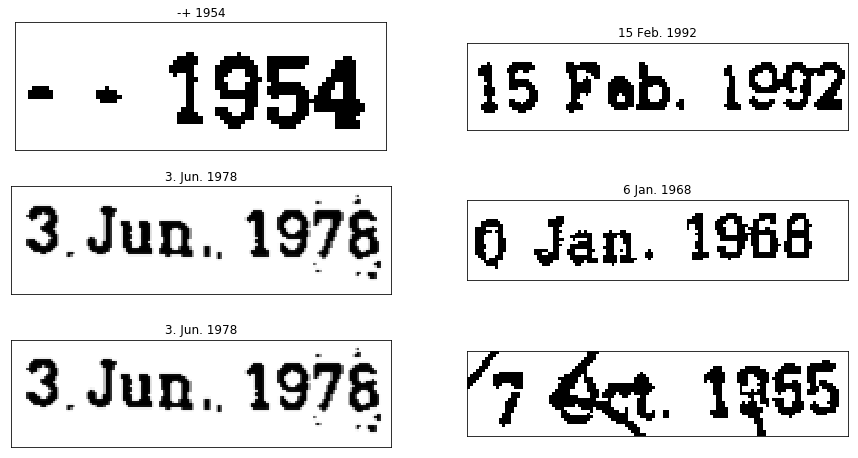

In [227]:
plotDenoising(date, "eng")

# Skimage noise removal

## Skimage image segmentation

In [655]:
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage.filters import sobel
from skimage import util 
from skimage import segmentation
import skimage
from skimage.util import img_as_ubyte

In [684]:
def boolToColor(x):
    return 1. if x==True else 0.
boolToColor = np.vectorize(boolToColor)

def removeSmallObjects(l, minSize, lang, clearBorder):
    elems = len(l)
    for i in range(elems):
        noisy = l[i]
        reverse = util.invert(noisy>0)
        label_objects, nb_labels = ndi.label(reverse)
        if clearBorder:
            label_objects = segmentation.clear_border(label_objects)
        sizes = np.bincount(label_objects.ravel())
        mask_sizes = sizes > minSize
        mask_sizes[0] = 0
        cleaned = util.invert(mask_sizes[label_objects])
        tesserIm = Image.fromarray(boolToColor(cleaned))
        trans = pytesseract.image_to_string(tesserIm, lang)
        plt.subplot(elems,2,2*i+1),plt.imshow(l[i])
        tesserImOrig = Image.fromarray(l[i])
        transOrig = pytesseract.image_to_string(tesserImOrig, lang)
        plt.title(transOrig)
        plt.xticks([]),plt.yticks([])
        plt.subplot(elems,2,2*i+2),plt.imshow(cleaned)
        plt.title(trans)
        plt.xticks([]),plt.yticks([])

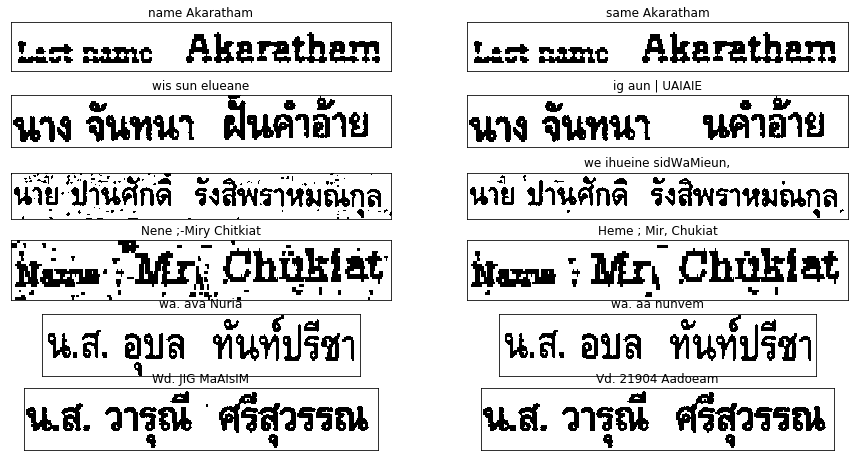

In [685]:
removeSmallObjects(nameSki, 10, "eng", True)

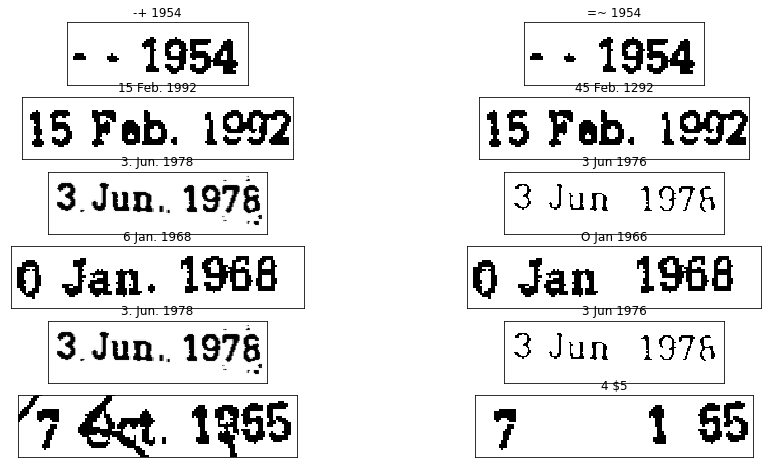

In [672]:
removeSmallObjects(dateSki, 8, "eng", True)

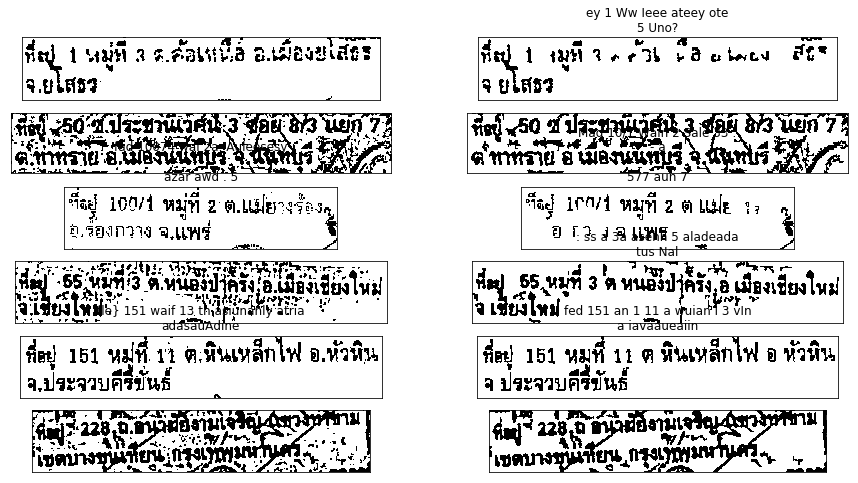

In [675]:
removeSmallObjects(addrSki, 30, "eng", False)

## Same but with opencv

In [751]:
def removeSmallObjectsOpencv(l, minSize, lang):
    for i in range(6):
        nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(np.invert(l[i]), connectivity=8)
        sizes = stats[1:, -1]; nb_components = nb_components - 1
        img2 = np.zeros((output.shape))
        for j in range(0, nb_components):
            if sizes[j] >= minSize:
                img2[output == j + 1] = 255
        img2= util.invert(img2)
        tesserIm = Image.fromarray(img2)
        trans = pytesseract.image_to_string(tesserIm, lang)
        plt.subplot(3,2,i+1),plt.imshow(img2)
        plt.title(trans)
        plt.xticks([]),plt.yticks([])

In [ ]:
removeSmallObjectsOpencv(name, 1500, "eng")  

In [746]:
srcImg = name[2].copy()
ret, dstImg = cv2.threshold(srcImg, 125, 255, cv2.THRESH_BINARY)

In [747]:
dstImg = cv2.bitwise_not(dstImg)
dstImg = cv2.rectangle(dstImg, (0,0), (dstImg.shape[1], dstImg.shape[0]), (255,255,255))

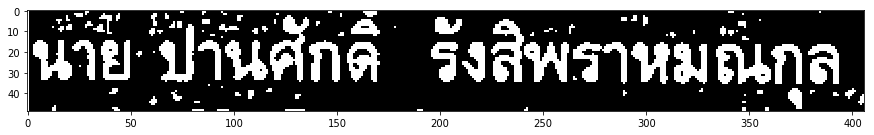

In [748]:
plt.imshow(dstImg)

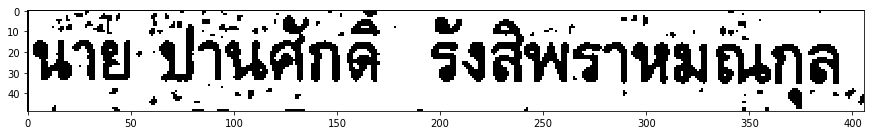

In [749]:
h, w = dstImg.shape[:2]
mask = np.zeros((h + 2, w + 2), np.uint8)
floodImg = cv2.floodFill(dstImg, mask, (0, 0), (255,255,255))
floodImgInv = cv2.bitwise_not(floodImg[1])
fillImg = dstImg | floodImg[1]
plt.imshow(cv2.bitwise_not(fillImg))

In [507]:
srcImg = name[3].copy()
ret, dstImg = cv2.threshold(srcImg, 127, 255, cv2.THRESH_BINARY)

In [508]:
im2, contours, hierarchy = cv2.findContours(dstImg,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [509]:
cv2.boundingRect(contours[0])

(460, 15, 10, 10)